# Basic `kosmatau3d` model

Here we will examine what are the basic parameters to set in order to establish a simple three-dimensional model. Since we want this example to be easily-relatable, we will attempt to build the `kosmatau3d` version of the famous Hollenbach and Tielens (1999) PDR structure image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from kosmatau3d import models
from matplotlib.ticker import AutoMinorLocator
from pprint import pprint

## Simple constant-density example

This example assumes each voxel in the seup has the same properties (mass, density, $\tau_\mathrm{FUV}$) and only differ in the amount of far-UV radiation. The attenuation of the radiation is then simple to calculate.

For our fiducial case we will assume a voxel size of 0.1 pc, an ensemble density of $10^4$ $\mathrm{cm}^{-3}$, and thus a mass of $\sim$0.16 $M_\odot$.

### without clumpyness

Here we want a voxel fully-filled with one clump. We can estimate this by specifying a clump mass equal to the ensemble mass and constraining it by requiring $f_\mathrm{V}=1$. This will mean $f_\mathrm{A}$ is a bit larger than 1, but we are looking more at the volume in this example.

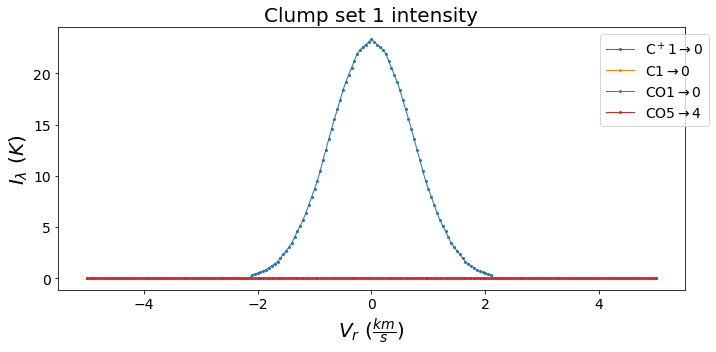


Volume Filling Factor
---------------------
Clump 1: 0.040

Density
---------------------
Clump 1: 1.000e+04



In [21]:
%matplotlib inline

suggested_calc = True

models.constants.n_sigma = 3

models.constants.dtype = np.float32

mass = 10

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters
                'voxel_size' : 1,
                 'molecules' : 'all',
                      'dust' : 'PAH',
            'clumpMassRange' : [[-2, 0]],
            #'clumpMassRange' : [[np.log10(mass)]],
           'clumpMassNumber' : [3],
           #'clumpMassNumber' : [1],
                 'clumpNmax' : [1],
             'velocityRange' : [-5, 5],
            'velocityNumber' : 201,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 0.71,#1,
              'ensembleMass' : [mass],#7.15, 5.22#10**1,#0.8,
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : [10**4],#4.13, 4.17#10**5,#4.5,
                       'FUV' : 10**6,#1.13, 1.07#1.7,
                      # 'crir' : 2e-16,
    
                # initialisation
                    'dilled' : True,

                # calculation
            'suggested_calc' : suggested_calc,
       'velocity_resolution' : 3,
    
                # logging
                   'verbose' : False,
                     'timed' : False,
                     'debug' : False
          }
    
vox = models.Voxel()
vox.setProperties(**parameters)
#print('initialised:', time()-t1)
vox.calculateEmission(verbose=False, timed=False)
#print('calculated:', time()-t1)
# vox.plot_clump_number(effective=True)
# vox.plotMolecule(quantity='intensity', kind='slinear', molecule=['C+ 1', 'O 1', 'CO 4', 'CO 45'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{O} 1 \rightarrow 0$', r'$\mathrm{CO} 4 \rightarrow 3$', r'$\mathrm{CO} 45 \rightarrow 46$'])
vox.plotMolecule(quantity='intensity', kind='slinear', molecule=['C+ 1', 'C 1', 'CO 1', 'CO 5'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$', r'$\mathrm{CO} 5 \rightarrow 4$'])
# vox.plotSpectrum(quantity='intensity', kind='slinear', integrated=True)

#print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()

In [6]:
(10**models.constants.clumpLogMass[0]*models.ensemble.clumpNj[0]).sum()

0.247

In [3]:
models.ensemble.clumpNj

[array([[5.44684421, 0.78730852, 0.11380071]])]

In [29]:
models.masspoints.clumpRadius[0][0]**2*np.pi

array([0.012086])

In [39]:
transitions = models.species.molecules
len(transitions)

171

In [86]:
models.species.moleculeWavelengths[transitions.index('O 2')]

0.00014551804423748544

In [63]:
transitions

['C+ 1',
 'C 1',
 'C 2',
 'C 3',
 'O 1',
 'O 2',
 'O 3',
 'CO 1',
 'CO 2',
 'CO 3',
 'CO 4',
 'CO 5',
 'CO 6',
 'CO 7',
 'CO 8',
 'CO 9',
 'CO 10',
 'CO 11',
 'CO 12',
 'CO 13',
 'CO 14',
 'CO 15',
 'CO 16',
 'CO 17',
 'CO 18',
 'CO 19',
 'CO 20',
 'CO 21',
 'CO 22',
 'CO 23',
 'CO 24',
 'CO 25',
 'CO 26',
 'CO 27',
 'CO 28',
 'CO 29',
 'CO 30',
 'CO 31',
 'CO 32',
 'CO 33',
 'CO 34',
 'CO 35',
 'CO 36',
 'CO 37',
 'CO 38',
 'CO 39',
 'CO 40',
 'CO 41',
 'CO 42',
 'CO 43',
 'CO 44',
 'CO 45',
 'CO 46',
 'CO 47',
 'CO 48',
 'CO 49',
 '13CO 1',
 '13CO 2',
 '13CO 3',
 '13CO 4',
 '13CO 5',
 '13CO 6',
 '13CO 7',
 '13CO 8',
 '13CO 9',
 '13CO 10',
 '13CO 11',
 '13CO 12',
 '13CO 13',
 '13CO 14',
 '13CO 15',
 '13CO 16',
 '13CO 17',
 '13CO 18',
 '13CO 19',
 '13CO 20',
 '13CO 21',
 '13CO 22',
 '13CO 23',
 '13CO 24',
 '13CO 25',
 '13CO 26',
 '13CO 27',
 '13CO 28',
 '13CO 29',
 '13CO 30',
 '13CO 31',
 '13CO 32',
 '13CO 33',
 '13CO 34',
 '13CO 35',
 '13CO 36',
 '13CO 37',
 '13CO 38',
 '13CO 39',
 '1

In [136]:
nvox = 10
ds = 0.1
FUV = 10**6
mass = 0.247
density = 10**4

parameters['voxel_size'] = ds
parameters['clumpMassRange'] = [[np.log10(mass)]]
parameters['ensembleMass'] = mass
parameters['ensembleDensity'] = density
vox = models.Voxel()
vox.setProperties(**parameters)
vox.calculateEmission()
tau_fuv = vox.getFUVabsorption()[0]
A_fuv = np.exp(-tau_fuv*np.arange(nvox))
positions = ds*(np.arange(nvox) + 0.5)

intensity = []

for A in A_fuv:
    vox = models.Voxel()
    parameters['FUV'] = A*FUV
    #print(A*FUV)
    vox.setProperties(**parameters)
    #print(vox.getFUVabsorption())
    vox.calculateEmission()
    intensity.append(vox.getSpeciesIntensity(integrated=True))

intensity = np.asarray(intensity)

In [162]:
A_fuv

array([1.00000000e+00, 2.87399790e-01, 8.25986392e-02, 2.37388316e-02,
       6.82253520e-03, 1.96079518e-03, 5.63532124e-04, 1.61959014e-04,
       4.65469866e-05, 1.33775942e-05])

In [160]:
x2.get_xticks()

array([1.00000000e+00, 2.87399790e-01, 8.25986392e-02, 2.37388316e-02,
       6.82253520e-03, 1.96079518e-03, 5.63532124e-04, 1.61959014e-04,
       4.65469866e-05, 1.33775942e-05])

In [166]:
inverse(forward(0.2))

0.9500000000000001

In [24]:
np.e

2.718281828459045

In [68]:
def pdr_structure(nvox=10, ds=1, FUV=10**6, mass=1, density=10**4, clumps=None, log=False, xlim=None, ylim=None, hspace=0.01):


    parameters['voxel_size'] = ds
    if clumps is None:
        parameters['clumpMassRange'] = [[np.log10(mass)]]
        parameters['clumpMassNumber'] = [1]
    else:
        parameters['clumpMassRange'] = clumps[0]
        parameters['clumpMassNumber'] = clumps[1]
    parameters['ensembleMass'] = mass
    parameters['ensembleDensity'] = density
    vox = models.Voxel()
    vox.setProperties(**parameters)
    vox.calculateEmission()
    tau_fuv = vox.getFUVabsorption()[0]
    A_fuv = 2.5 * np.log10(np.e) * tau_fuv*np.arange(nvox)
    positions = ds*(np.arange(nvox) + 0.5)

    FUV_arr = []
    intensity = []

    for A in A_fuv:
        vox = models.Voxel()
        parameters['FUV'] = FUV*np.exp(-A)
        FUV_arr.append(FUV*np.exp(-A))
        #print(A*FUV)
        vox.setProperties(**parameters)
        #print(vox.getFUVabsorption())
        vox.calculateEmission()
        intensity.append(vox.getSpeciesIntensity(integrated=True))

    intensity = np.asarray(intensity)

    def forward(x):
        return np.interp(x, positions, A_fuv)

    def inverse(x):
        return np.interp(x, np.sort(A_fuv), positions[np.argsort(A_fuv)])

    included_transitions = ['C+ 1', 'C 1', 'CO 1', 
                            '13C+ 1', '13C 1', '13CO 1', 
                            'HCO+ 1', 'H13CO+ 1', 'H3O+ 1']
    labels = [r'C$^+$ 1$\to$0', r'C 1$\to$0', r'CO 1$\to$0', 
            r'$^{13}$C$^+$ 1$\to$0', r'$^{13}$C 1$\to$0', r'$^{13}$CO 1$\to$0', 
            r'HCO$^+$ 1$\to$0', r'H$^{13}$CO$^+$ 1$\to$0', r'H$_3$O$^+$ 1$\to$0']

    fig, ax = plt.subplots(2, 1, sharex=True,figsize=(10, 10))
    fig.subplots_adjust(hspace=hspace)
    #ax.plot(positions, np.log10(intensity[:, transitions.index('C+ 1')]), label=r'C$^+$ 1$\to$0')
    #ax.plot(positions, np.log10(intensity[:, transitions.index('C 1')]), label=r'C 1$\to$0')
    #ax.plot(positions, np.log10(intensity[:, transitions.index('CO 1')]), label=r'CO 1$\to$0')
    #ax.plot(positions, np.log10(intensity[:, transitions.index('13C+ 1')]), label=r'$^{13}$C$^+$ 1$\to$0')
    #ax.plot(positions, np.log10(intensity[:, transitions.index('13C 1')]), label=r'$^{13}$C 1$\to$0')
    #ax.plot(positions, np.log10(intensity[:, transitions.index('13CO 1')]), label=r'$^{13}$CO 1$\to$0')
    #ax.plot(positions, np.log10(intensity[:, transitions.index('HCO+ 1')]), label=r'HCO$^+$ 1$\to$0')
    #ax.plot(positions, np.log10(intensity[:, transitions.index('H13CO+ 1')]), label=r'H$^{13}$CO$^+$ 1$\to$0')
    #ax.plot(positions, np.log10(intensity[:, transitions.index('H3O+ 1')]), label=r'H$_3$O$^+$ 1$\to$0')
    x_new = np.linspace(0, ds*nvox, num=1000)
    ax[0].semilogy(x_new, np.interp(x_new, positions, FUV_arr))
    for i, trans in enumerate(included_transitions):
        intensity_new = np.interp(x_new, positions, intensity[:, included_transitions.index(trans)])
        if log:
            ax[1].semilogy(x_new, intensity_new, label=labels[i])
        else:
            ax[1].plot(x_new, intensity_new, label=labels[i])
    ax[1].legend()
    if xlim:
        ax[0].set_xlim(xlim)
        ax[1].set_xlim(xlim)
    else:
        ax[0].set_xlim(0, ds*nvox)
        ax[1].set_xlim(0, ds*nvox)
    if ylim:
        ax[1].set_ylim(ylim)
        #ax[0].set_ylim(ylim)
    else:
        ax[1].set_ylim(-10, 10)
        #ax[0].set_ylim(-10, 10)
    ax[1].set_xlabel('Depth (pc)', fontsize=16)
    x2 = ax[0].secondary_xaxis('top', functions=(forward, inverse))
    x2.set_xticks(np.arange(0, A_fuv.max(), A_fuv.max()/8))
    x2.xaxis.set_minor_locator(AutoMinorLocator())
    x2.set_xlabel(r'$A_\mathrm{FUV}$', fontsize=16)
    ax[0].set_ylabel(r'$\chi$', fontsize=16)
    ax[1].set_ylabel(r'log$_{10}$(T$_\mathrm{B}$) (K)', fontsize=16)

    return fig, ax

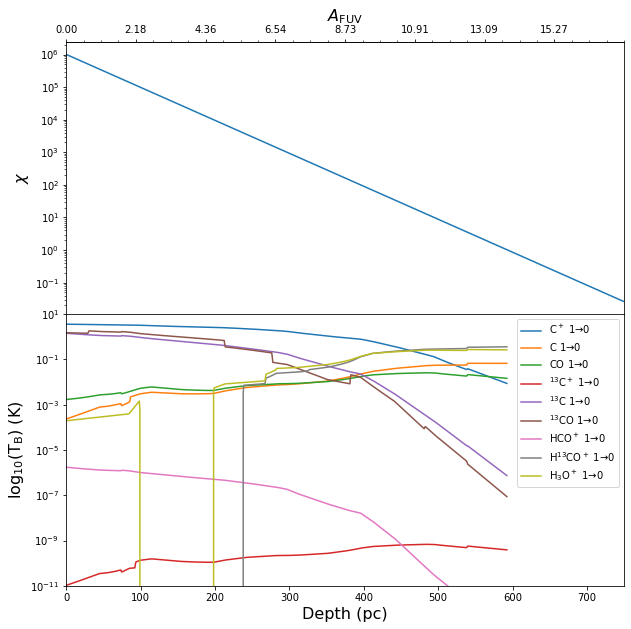

In [75]:
fig, ax = pdr_structure(nvox=750, ds=1, density=10**4, mass=1, clumps=([[-1, 1]], [3]), log=True, ylim=(1e-11, 1e1), hspace=0.001)
plt.savefig('plots/pdr_structure_n_1e4_inhomogeneous_alt.png')

In [59]:
A_fuv

array([1.00000000e+00, 2.87399790e-01, 8.25986392e-02, 2.37388316e-02,
       6.82253520e-03, 1.96079518e-03, 5.63532124e-04, 1.61959014e-04,
       4.65469866e-05, 1.33775942e-05, 3.84471775e-06, 1.10497107e-06,
       3.17568455e-07, 9.12691072e-08, 2.62307222e-08, 7.53870406e-09,
       2.16662196e-09, 6.22686697e-10, 1.78960026e-10, 5.14330738e-11])

In [36]:
intensity.shape

(10, 171)

As you can see, the ideal mass is 0.247 $M_\odot$

### using a clump distribution

Now we can use a proper distribution of clump masses in each voxel.

## grid files

Every model must be created from some datafiles, at least to obtain the necessary parameters (mass, density, and far-UV radiation). Our purpose does not require anything complex with varying mass or density, but rather we will assume some constant far-UV radiation from one direction and calculate how the absorption and radiative transfer affects the intensity in each voxel. For that reason we will first create mock grid files in a new directory, then `kosmatau3d` will read the model information from there.

In this example we will use voxels of size 1 pc containing mass $100$ $M_\odot$ and density $10^4$ cm$^{-3}$. Each voxel will also need some velocity information, so we want $v_\mathrm{vox}=0$ km s$^{-1}$ and $\sigma_\mathrm{ens}=1$ km s$^{-1}$. Finally the far-UV radiation (neglecting absorption) will be constant at $10^5$ $\chi_D$. We will see later how accounting for absorption will affect the far-UV penetration.

In [8]:
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(1, 10, num=10)
y = np.ones_like(x)

fx = interp1d(x, y, fill_value='extrapolate')
fx(-5000)

array(1.)

## setting the model parameters

Now that we have grid files from which `kosmatau3d` will read the voxel properties, we simply need to pass the necessary parameters to the `Model` constructor.

In [ ]:
parameters = {
              # Model information
              'history_path': '',# r'/mnt/hpc_backup/yanitski/projects/pdr/KT3_history',
              'directory': '',
              'folder': 'HT99',
              'x': 10,
              'y': 5,
              'z': 0,
              'modelType': 'block',

              # Model parameters
              'resolution': 1,
              'molecules': 'all',
              # 'molecules': ['C+ 1', 
              #               'C 1', 'C 2', 
              #               'CO 1', 'CO 2', 'CO 3', 'CO 4', 'CO 5', 
              #               'CO 6', 'CO 7', 'CO 8', 
              #               '13C+ 1', 
              #               '13C 1', '13C 2', 
              #               '13CO 1', '13CO 2', '13CO 3', '13CO 4', '13CO 5', 
              #               '13CO 6', '13CO 7', '13CO 8', 
              #               'HCO+ 1', 'HCO+ 2', 'HCO+ 3', 'HCO+ 4', 'HCO+ 5'],
              'dust': 'PAH',
              # 'dust': ['240um', '550um'],
              'clumpMassRange': [[-1, 2]],
              'clumpMassNumber': [4],
              'clumpNmax': [None],
              'clumpLogFUV' : None,
              'interclumpLogFUV' : None,
              'velocityRange': [-10, 10],
              'velocityNumber': 21,

              # Flags
              'suggested_calc': True,
              'dilled': True,

              # Property factors
              'hi_mass_factor': 1,
              'h2_mass_factor': 1,
              'ensemble_mass_factor': [1, 1],
              'fuv_factor': 1,
              'density_factor': 1,
              'interclump_hi_ratio': 1,
              'r_cmz': 0,

              # Logging
              'timed': False,
              'debug': False,
              'verbose': False
              }